In [1]:
# Library yang digunakan (pastikan sudah terinstall):
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, step
import control as ctrl

# RLC Circuit without Feedback

## Openloop Transfer Function
$$G(s)=\frac{V_c(s)}{V_{in}(s)}=\frac{1}{LCs^2+RCs+1}$$
$$G(s)=\frac{\omega_n^2}{s^2+2\zeta\omega_ns+\omega_n^2}$$
with:
* Natural frequency $\omega_n$
* damping ration $\zeta$

## Variasi Nilai
* natural frequency: $\omega_n^2=\frac{1}{LC}$
* damping ratio: $\zeta=\frac{R}{2\sqrt{\frac{L}{C}}}$

In [20]:
# Masukkan variasi nilai untuk R, L, dan C
R = [100, 50, 150, 200, 100, 100, 100, 100, 100, 100] # Ohms
L = [100, 100, 100, 100, 50, 150, 200, 100, 100, 100] # Henry
C = [100, 100, 100, 100, 100, 100, 100, 50, 150, 200] # Farad


R= 100 ohm, L = 100 henry, C = 100 farad
Natural freq = 1.0, dumping ratio = 50.0

R= 50 ohm, L = 100 henry, C = 100 farad
Natural freq = 1.0, dumping ratio = 25.0

R= 150 ohm, L = 100 henry, C = 100 farad
Natural freq = 1.0, dumping ratio = 75.0

R= 200 ohm, L = 100 henry, C = 100 farad
Natural freq = 1.0, dumping ratio = 100.0

R= 100 ohm, L = 50 henry, C = 100 farad
Natural freq = 1.4142135623730951, dumping ratio = 70.71067811865474

R= 100 ohm, L = 150 henry, C = 100 farad
Natural freq = 0.816496580927726, dumping ratio = 40.824829046386306

R= 100 ohm, L = 200 henry, C = 100 farad
Natural freq = 0.7071067811865476, dumping ratio = 35.35533905932737

R= 100 ohm, L = 100 henry, C = 50 farad
Natural freq = 0.7071067811865476, dumping ratio = 35.35533905932737

R= 100 ohm, L = 100 henry, C = 150 farad
Natural freq = 1.224744871391589, dumping ratio = 61.237243569579455

R= 100 ohm, L = 100 henry, C = 200 farad
Natural freq = 1.4142135623730951, dumping ratio = 70.71067811865474



C:\Users\Muham\AppData\Local\Temp\ipykernel_4072\4179072786.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


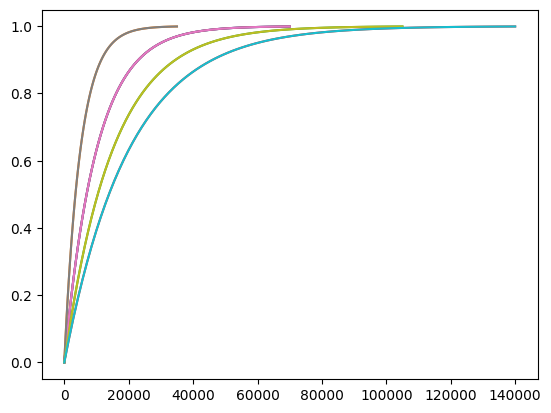

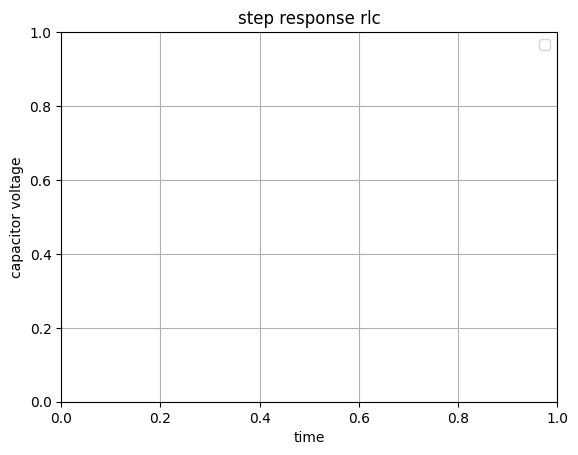

C:\Users\Muham\AppData\Local\Temp\ipykernel_4072\4179072786.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


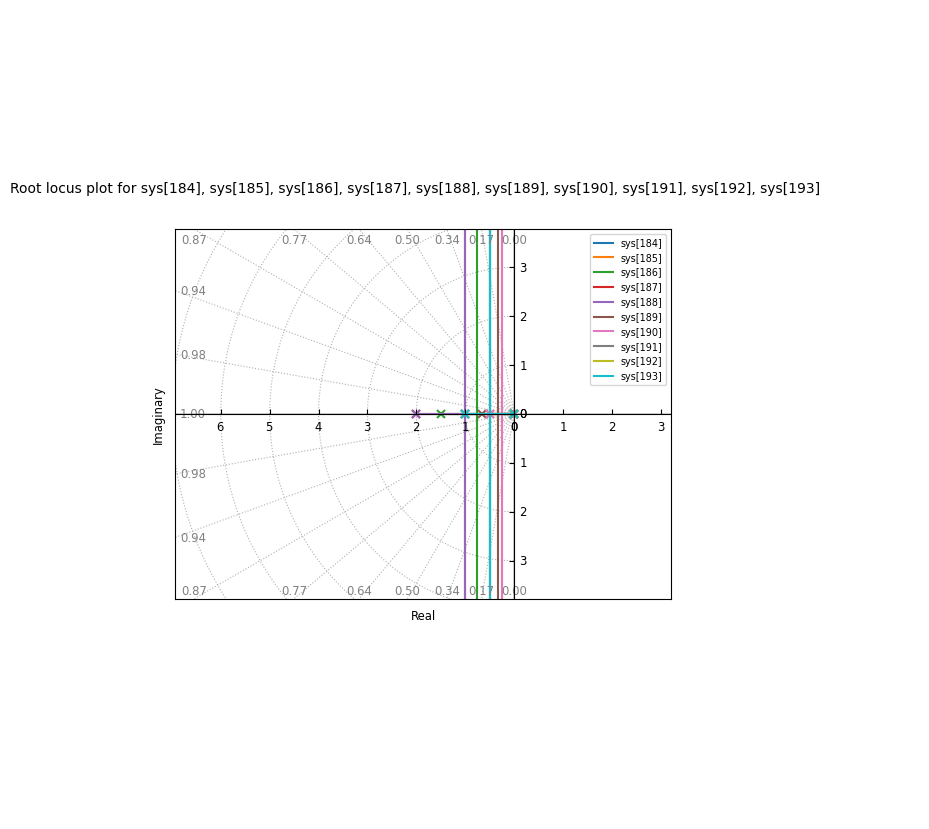

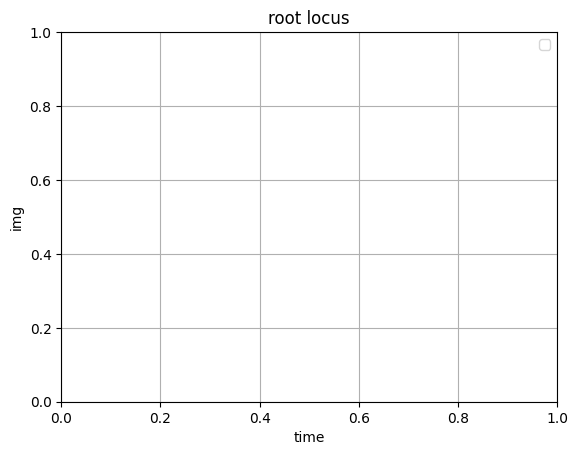

In [25]:
# Masukkan variasi nilai untuk R, L, dan C
R = [100, 50, 150, 200, 100, 100, 100, 100, 100, 100] # Ohms
L = [100, 100, 100, 100, 50, 150, 200, 100, 100, 100] # Henry
C = [100, 100, 100, 100, 100, 100, 100, 50, 150, 200] # Farad

# Buat transfer function dan step response untuk rangkaian RLC seri
for r, l, c in zip(R, L, C):
    num = [1]
    den = [l * c, r * c, 1]
    print(f"R= {r} ohm, L = {l} henry, C = {c} farad")
    Gs = ctrl.TransferFunction(num, den)

    # Hitung natural frequency and damping ratio
    wn = np.sqrt(1/l*c)
    d_ratio = r/(2*np.sqrt(l/c))
    print(f"Natural freq = {wn}, dumping ratio = {d_ratio}\n")
    sys = lti(num, den)
    t, y = step(sys)
    plt.plot(t, y)

# Plot step response (waktu terhadap tegangan kapasitor)
plt.figure()
plt.title("step response rlc")
plt.ylabel("capacitor voltage")
plt.xlabel("time")
plt.legend()
plt.grid()
plt.show()

# Buat analisis Root Locus Untuk Sistem
for r, l, c in zip(R, L, C):
    num = [1]
    den = [l * c, r * c, 1]
    Gs = ctrl.TransferFunction(num, den)
    rc = ctrl.root_locus(Gs)

plt.figure()
plt.title("root locus")
plt.xlabel("time")
plt.ylabel("img")
plt.legend()
plt.grid()
plt.show()